
# PROYECTO OPERACIONES ESPACIALES Y GEOMÉTRICAS EN DATOS VECTORIALES

Workshop 6 
**Programación SIG**   2025-1

Estudiante: Gizela Andrea Guzmán Lugo

16/06/2025

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
## LOCALIZACIÓN CENTRO DE ACOPIO - CULTIVO DE INTERÉS

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
Este código tiene como objetivo apoyar el proceso de localización óptima de un centro de acopio para un cultivo agrícola de interés en el territorio nacional. La metodología implementada se basa en un enfoque jerárquico y espacialmente explícito, que considera tanto datos de producción como criterios geográficos y ambientales.

El proceso se desarrolla en tres etapas principales:

**Selección del departamento más productivo:**
Se analiza la base de datos de producción agropecuaria a nivel nacional para identificar el departamento con mayor volumen de producción del cultivo seleccionado. Esto permite enfocar los esfuerzos de planificación en las zonas más relevantes desde el punto de vista económico y agrícola.

**Identificación del municipio óptimo:**
Dentro del departamento seleccionado, se realiza una evaluación multicriterio para priorizar municipios según variables como densidad vial, cercania a vias principales, producción (EVA), y el número de estaciones IDEAM, factores relevantes para la logística agroindustrial. El resultado es la identificación del municipio más adecuado para la instalación del centro de acopio.

**Selección de la zona local dentro del municipio:**
Finalmente, se emplean técnicas de análisis espacial sobre capas vectoriales, incluyendo coberturas de la tierra, zonificación de amenaza por remoción en masa, y accesibilidad vial, con el fin de delimitar la mejor zona dentro del municipio para la construcción del centro de acopio.

Este enfoque permite garantizar que la localización propuesta no solo sea técnicamente viable, sino también social, ambiental y económicamente sostenible. 

A continuación, se presenta el código detallado que implementa cada una de estas etapas; el cual es reproducible para cualquier cultivo

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
### 1. ⚙️Importación librerias

Se importa las librerías necesarias para llevar a cabo el análisis espacial. Estas herramientas permiten cargar, procesar, visualizar y transformar datos geográficos.

| Librería                         | Función principal                                                                 |
|----------------------------------|-----------------------------------------------------------------------------------|
| `geopandas`                      | Manejo de datos geográficos vectoriales (shapefiles, GeoJSON, etc.).             |
| `pandas`                         | Manipulación de datos tabulares (atributos, uniones, cálculos no espaciales).    |
| `numpy`                          | Cálculos numéricos, creación de rangos y arreglos espaciales.                    |
| `matplotlib.pyplot`              | Visualización de datos, generación de mapas y gráficos estáticos.                |
| `contextily`                     | Agregar mapas base tipo web (como CartoDB o OpenStreetMap) a los gráficos.       |
| `matplotlib.patches`             | Creación de leyendas personalizadas para mapas.                                  |
| `shapely.affinity`              | Aplicar transformaciones geométricas como rotación, escala y traslación.         |
| `pathlib.Path`                   | Gestión de rutas de archivos de manera flexible y multiplataforma.               |
| `shapely.geometry`              | Creación y manipulación de geometrías básicas como `Point`, `Polygon`, etc.      |



In [9]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as cx
import matplotlib.patches as mpatches
from shapely import affinity
from pathlib import Path
from shapely.geometry import Point, Polygon

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
### 2. 🗺️Selección municipio para la construcción del centro de acopio 

El primer paso en el proceso de localización consiste en identificar el departamento que presenta mayor producción del cultivo de interés, a partir de datos agropecuarios oficiales a nivel nacional. Para ello, se utiliza una base de datos (Evaluaciones_Agropecuarias_Municipales_EVA) que detalla la producción total (en toneladas) por cultivo y por municipio, lo cual permite agrupar y sumar estos valores a nivel departamental.

Esta etapa tiene como finalidad enfocar el análisis en las regiones que representan un mayor aporte nacional del cultivo, asegurando que el centro de acopio propuesto responda a una demanda real, concentrada y estratégicamente localizada.

Una vez determinado el departamento prioritario, se lleva a cabo una evaluación multicriterio espacial para seleccionar el municipio más adecuado dentro de dicho territorio. Esta selección se basa en variables clave que inciden directamente en la logística y viabilidad operativa del centro de acopio:

* Densidad vial: cantidad de red vial en relación con el área del municipio, como indicador de accesibilidad y conectividad.

* Cercanía a vías principales: medida del porcentaje de área municipal que se encuentra próxima a vías primarias, lo cual facilita el transporte de productos.

* Producción EVA : proporción de producción del cultivo respecto al área, para identificar zonas con alta intensidad productiva.

* Número de estaciones IDEAM: cantidad de estaciones meteorológicas presentes en el municipio, útil para monitoreo climático y toma de decisiones agronómicas.

Cada uno de estos criterios es normalizado y ponderado para generar un índice compuesto que permita ordenar y comparar los municipios. De este modo, se selecciona el municipio con las condiciones más favorables para la implementación del centro de acopio, considerando tanto la oferta productiva como los factores logísticos y ambientales.

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.1 🗂️Cargue y preparación datos base

Lo primero que se realiza es el cargue de los datos base para el análisis espacial y evaluación multicriterio, estos datos incluyen tanto información vectorial como tabular:

* Un archivo Shapefile (.shp) con los municipios de Colombia, que contiene geometrías y atributos administrativos

* Un archivo Shapefile (.shp) con la infraestructural vial, que contiene las principales vias del pais categorizadas

* Datos de las Evaluaciones Agropecuarias Municipales (EVA) en formato CSV, que representan información agrícola organizada por municipio y año

* Datos de las estaciones meteorológicas del IDEAM, en formato CSV que incluyen coordenadas espaciales


In [10]:
Ruta_Carpeta=r"/notebooks/Datos"

MUNICIPIOS = Ruta_Carpeta+'/municipios_colombia.shp'
VIAS = Ruta_Carpeta+'/InfraestructuraVial.shp'
EVA_CSV   = Ruta_Carpeta+'/Evaluaciones_Agropecuarias_Municipales_EVA.csv'
EST_CSV   = Ruta_Carpeta+'/Catalogo_Estaciones_IDEAM.csv'

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.1.1 Cargue capas geográficas Municipios y vías

| Paso | Función/Código | Descripción |
|------|----------------|-------------|
| 1 | `muni = gpd.read_file(MUNICIPIOS).to_crs(epsg=9377)` | Carga la capa de municipios de Colombia desde la ruta almacenada en la variable `MUNICIPIOS` y la reproyecta al sistema de coordenadas EPSG 9377 (Magna_sirgas_Origen_Nacional). |
| 2 | `print("CRS Municipios:", muni.crs)` | Imprime en pantalla el sistema de referencia de coordenadas (CRS) de la capa de municipios, para verificar que se ha transformado correctamente. |
| 3 | `muni.info()` | Muestra información general del GeoDataFrame `muni`, incluyendo el número de registros, tipos de datos y nombres de columnas disponibles. Esto ayuda a conocer la estructura de la base de datos. |
| 4 | `vias = gpd.read_file(VIAS).to_crs(epsg=9377)` | Carga la capa de vías desde la ruta especificada en la variable `VIAS` y la reproyecta al mismo sistema de coordenadas EPSG 9377 para garantizar la compatibilidad espacial.|
| 5 | `print("CRS Vias:", vias.crs)` | Imprime el sistema de coordenadas de la capa de vías para confirmar que ha sido correctamente transformado. |
| 6 | `vias.head()` | Muestra las primeras filas del GeoDataFrame `vias`, lo que permite visualizar los atributos disponible. |

In [11]:
# Municipios Colombia
muni = gpd.read_file(MUNICIPIOS).to_crs(epsg=9377)
print("CRS Municipios:", muni.crs)  
muni.info()

#Vias
vias = gpd.read_file(VIAS).to_crs(epsg=9377)
print("CRS Vias:", vias.crs)  
vias.head()

CRS Municipios: EPSG:9377
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1122 entries, 0 to 1121
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DPTO_CCDGO  1122 non-null   object  
 1   MPIO_CCDGO  1122 non-null   object  
 2   MPIO_CNMBR  1122 non-null   object  
 3   MPIO_CDPMP  1122 non-null   object  
 4   VERSION     1122 non-null   int32   
 5   AREA        1122 non-null   float64 
 6   LATITUD     1122 non-null   float64 
 7   LONGITUD    1122 non-null   float64 
 8   STCTNENCUE  1122 non-null   float64 
 9   STP3_1_SI   1122 non-null   float64 
 10  STP3_2_NO   1122 non-null   float64 
 11  STP3A_RI    1122 non-null   float64 
 12  STP3B_TCN   1122 non-null   float64 
 13  STP4_1_SI   1122 non-null   float64 
 14  STP4_2_NO   1122 non-null   float64 
 15  STP9_1_USO  1122 non-null   float64 
 16  STP9_2_USO  1122 non-null   float64 
 17  STP9_3_USO  1122 non-null   float64 
 18  STP9_4_USO  11

,objectid,key,cod_tramo,codigo_via,pr_inicial,dist_ini,pr_finl,dist_fin,territoria,tramo,...,pr_ini_con,pr_fin_con,ruleid_1,inline_fid,simlnflag,maxsimptol,minsimptol,MONGUI,Shape_Leng,geometry
0,1,Primer Orden,400350,4003,50,80,50,365.0,Tolima,Transversal Buenaventura - Villavicencio - Pue...,...,50+80,50+365,INVIAS,623,0,0.5,0.5,0.0,284.940658,"LINESTRING (4731026.829 2049235.99, 4731311.53..."
1,2,Primer Orden,50090,5009,0,0,35,0.0,Cundinamarca,Conexión Transversal Buenaventura - Puerto Car...,...,0+0,35+0,ANI,625,0,0.5,0.5,0.0,34878.077760,"LINESTRING (4887938.14 2073457.977, 4887977.28..."
2,3,None,None,None,0,0,0,0.0,Cundinamarca,None,...,None,None,ANI,626,0,0.5,0.5,0.0,1874.955607,"LINESTRING (4890321.572 2111686.636, 4890152.9..."
3,4,Primer Orden,56077,5607,7,146,45,790.0,Cundinamarca,Conexión Troncal Central del Norte - Troncal V...,...,7+146,45+790,ANI,629,0,0.5,0.5,0.0,38149.573048,"LINESTRING (4926026.168 2121957.134, 4926027.6..."
4,5,Primer Orden,40CNA0,40CNA,0,0,0,772.0,Cundinamarca,Transversal Buenaventura - Villavicencio - Pue...,...,0+0,0+772,INVIAS,630,0,0.5,0.5,0.0,779.615289,"LINESTRING (4884563.878 2049243.545, 4884565.8..."


<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.1.2 Cargue Evaluaciones Agropecuarias Municipales (EVA)

| Paso | Función/Código | Descripción |
|------|----------------|-------------|
| 1 | `eva = pd.read_csv(EVA_CSV, encoding='utf-8')` | Carga el archivo CSV con los resultados de las Evaluaciones Agropecuarias Municipales (EVA), usando `pandas`. El parámetro `encoding='utf-8'` garantiza que los caracteres especiales (como tildes y eñes) se lean correctamente. |
| 2 | `print('Lista columnas EVA', eva.columns.tolist())` | Imprime una lista con los nombres de todas las columnas del DataFrame `eva`, lo cual permite conocer qué variables contiene la base de datos (por ejemplo: cultivo, municipio, producción, año, etc.). |
| 3 | `print(eva.head())` | Muestra las primeras 5 filas del DataFrame `eva`, útil para examinar cómo están organizados los datos y verificar que se han cargado correctamente. |

In [12]:
#Evaluaciones Agropecuarias Municipales EVA
eva = pd.read_csv(EVA_CSV, encoding='utf-8')

print('Lista columnas EVA', eva.columns.tolist())
print(eva.head())

Lista columnas EVA ['CÓD. \nDEP.', 'DEPARTAMENTO', 'CÓD. MUN.', 'MUNICIPIO', 'GRUPO \nDE CULTIVO', 'SUBGRUPO \nDE CULTIVO', 'CULTIVO', 'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO', 'Área Sembrada\n(ha)', 'Área Cosechada\n(ha)', 'Producción\n(t)', 'Rendimiento\n(t/ha)', 'ESTADO FISICO PRODUCCION', 'NOMBRE \nCIENTIFICO', 'CICLO DE CULTIVO']
   CÓD. \nDEP.        DEPARTAMENTO  CÓD. MUN.   MUNICIPIO GRUPO \nDE CULTIVO  \
0           15              BOYACA      15114    BUSBANZA         HORTALIZAS   
1           25        CUNDINAMARCA      25754      SOACHA         HORTALIZAS   
2           25        CUNDINAMARCA      25214        COTA         HORTALIZAS   
3           54  NORTE DE SANTANDER      54405  LOS PATIOS         HORTALIZAS   
4           54  NORTE DE SANTANDER      54518    PAMPLONA         HORTALIZAS   

  SUBGRUPO \nDE CULTIVO CULTIVO DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO  \
0                ACELGA  ACELGA                                        ACELG

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.1.3 Cargue estaciones IDEAM

| Paso | Función/Código | Descripción |
|------|----------------|-------------|
| 1 | `estaciones = pd.read_csv(EST_CSV, encoding='utf-8')` | Carga el archivo CSV que contiene información de las estaciones, usando codificación UTF-8 para preservar caracteres especiales. |
| 2 | `coords = (estaciones["Ubicación"].str.strip("()").str.split(",", expand=True).astype(float))` | Extrae las coordenadas geográficas contenidas en la columna `"Ubicación"`, eliminando los paréntesis, separando la latitud y longitud por coma, y convirtiendo los valores a tipo `float`. |
| 3 | `estaciones["lat"], estaciones["lon"] = coords[0], coords[1]` | Asigna las coordenadas extraídas a dos nuevas columnas del DataFrame: `"lat"` (latitud) y `"lon"` (longitud). |
| 4 | `gdf_est = gpd.GeoDataFrame(...).to_crs(epsg=9377)` | Convierte el DataFrame `estaciones` en un GeoDataFrame `gdf_est`, usando las columnas `"lon"` y `"lat"` para crear geometrías tipo punto. Inicialmente se define el sistema de referencia y luego se reproyecta. |
| 5 | `print(gdf_est.head())` | Muestra las primeras 5 filas del GeoDataFrame `gdf_est`, para confirmar que la geometría y los datos fueron correctamente generados. |
| 6 | `print('Lista columnas Estaciones', gdf_est.columns.tolist())` | Imprime la lista de columnas presentes en `gdf_est`, útil para revisar los atributos disponibles. |                                                                                               |

In [13]:
#Estaciones IDEAM
estaciones = pd.read_csv(EST_CSV, encoding='utf-8')

#Extraer coordenadas de ubicación (lat, lon)

coords = (estaciones["Ubicación"]
            .str.strip("()")
            .str.split(",", expand=True)
            .astype(float))
estaciones["lat"], estaciones["lon"] = coords[0], coords[1]

# Convertir a GeoDataframe
gdf_est = gpd.GeoDataFrame(
    estaciones,
    geometry=gpd.points_from_xy(estaciones["lon"], estaciones["lat"]),
    crs="EPSG:4326"
).to_crs(epsg=9377)

print(gdf_est.head())
print('Lista columnas Estaciones', gdf_est.columns.tolist())

     Codigo                          Nombre            Categoria  Estado  \
0  52057100      RUMICHACA - AUT [52057100]         Limnigráfica  Activa   
1  52055170    LA JOSEFINA - AUT [52055170]  Climática Principal  Activa   
2  52055220     EL PARAISO - AUT [52055220]  Climática Principal  Activa   
3  44015070      EL PEPINO - AUT [44015070]  Climática Principal  Activa   
4  48015040  PUERTO NARINO - AUT [48015040]  Climática Principal  Activa   

  Departamento      Municipio                    Ubicación  Altitud  \
0       Nariño        Ipiales   (0.81378611, -77.66197778)     2582   
1       Nariño      Contadero   (0.93030556, -77.49119444)     2450   
2       Nariño      Túquerres   (1.07061111, -77.63688889)     3120   
3     Putumayo          Mocoa   (1.08288889, -76.66711111)      760   
4     Amazonas  Puerto Nariño  (-3.78030556, -70.36263889)      158   

  Fecha_instalacion Fecha_suspension Corriente       lat        lon  \
0        2016-11-15              NaN  Guaitar

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.1.4 Visualizacion Datos

| Paso | Función/Código | Descripción |
|------|----------------|-------------|
| 1 | `est_3857 = gdf_est.to_crs(epsg=3857)` | Reproyecta el GeoDataFrame de estaciones (`gdf_est`) al sistema de coordenadas EPSG:3857 (Web Mercator), necesario para superponer correctamente un mapa base tipo tile (como los de CartoDB o OpenStreetMap). |
| 2 | `muni_3857 = muni.to_crs(3857)` | Reproyecta la capa de municipios al mismo sistema EPSG:3857 para asegurar compatibilidad espacial en la visualización. |
| 3 | `vias_3857 = vias.to_crs(3857)` | Reproyecta la capa de vías al sistema EPSG:3857. |
| 4 | `fig, ax = plt.subplots(figsize=(10, 10))` | Crea una figura y un eje (`ax`) con tamaño definido para la visualización geoespacial. |
| 5 | `est_3857.plot(...)` | Dibuja los puntos de las estaciones IDEAM en color verde, con tamaño y transparencia definidos, y etiqueta para la leyenda. |
| 6 | `muni_3857.boundary.plot(...)` | Dibuja solo los bordes de los municipios con líneas negras delgadas. Esto ayuda a delimitar las unidades administrativas sin rellenar su interior. |
| 7 | `vias_3857.plot(...)` | Dibuja las vías en color rojo, con mayor grosor para resaltar su jerarquía dentro del mapa. |
| 8 | `cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)` | Añade un mapa base (tiles) de CartoDB estilo “Voyager”, que mejora el contexto visual del mapa con fondo geográfico. |
| 9 | `ax.set_title(...)` | Asigna un título a la visualización. |
| 10 | `ax.set_axis_off()` | Oculta los ejes del gráfico para una presentación más limpia del mapa. |
| 11 | `ax.legend()` | Agrega una leyenda automática basada en las etiquetas (`label`) definidas en cada capa. |
| 12 | `plt.tight_layout()` | Ajusta el diseño de la figura para evitar solapamientos y mejorar la presentación. |
| 13 | `plt.show()` | Muestra el mapa interactivo generado. |

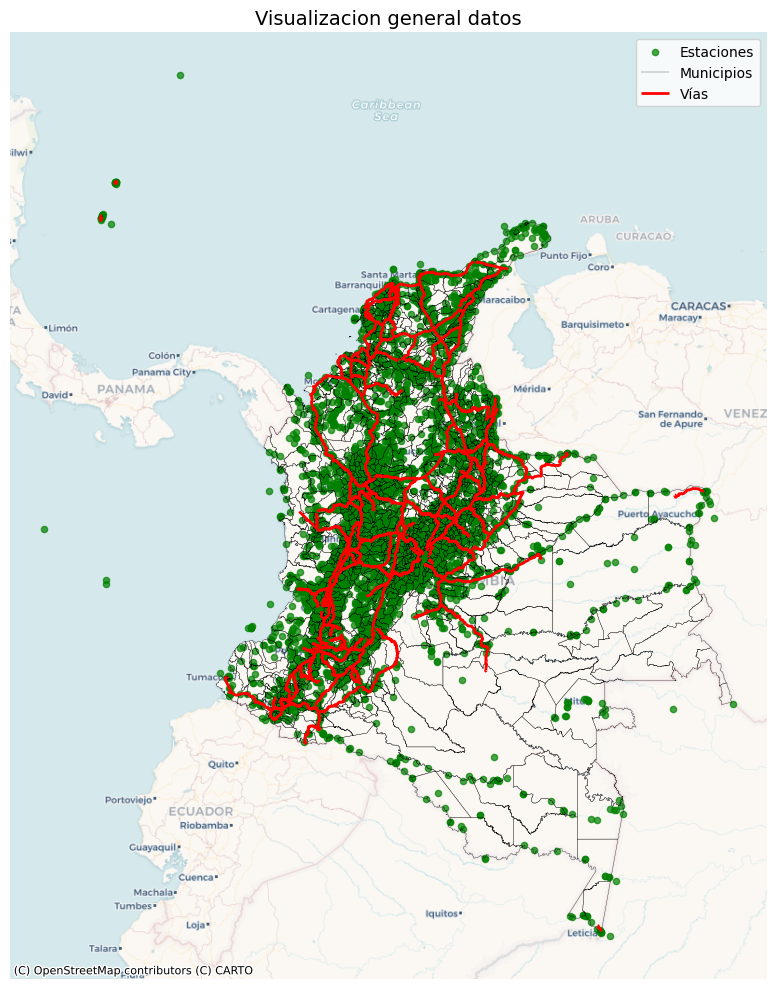

In [13]:
#Proyeccion sistema Mercator para visualizar
est_3857= gdf_est.to_crs(epsg=3857)
muni_3857 = muni.to_crs(3857)
vias_3857= vias.to_crs(3857)

#Visualización general datos -Selección Municipio
fig, ax = plt.subplots(figsize=(10, 10))
est_3857.plot(ax=ax, color='green', markersize=20, alpha=0.7, label='Estaciones')
muni_3857.boundary.plot(ax=ax, edgecolor='black', linewidth=0.2, label='Municipios')
vias_3857.plot(ax=ax, color='red', linewidth=2, label='Vías')

cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)
ax.set_title("Visualizacion general datos", fontsize=14)
ax.set_axis_off()
ax.legend()
plt.tight_layout()
plt.show()

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.2 🛠️ Preparación y estandarización datos

#### 2.2.1 Estandarización código Municipio

Antes de realizar análisis o combinar diferentes fuentes de datos, es importante estandarizar las variables clave, como los identificadores de los municipios. En este caso, tanto en el shapefile de municipios como en la base de datos EVA, se unificaron los códigos de municipio, convirtiéndolos a texto y rellenándolos con ceros a la izquierda hasta alcanzar una longitud de cinco caracteres. Esta transformación garantiza que todos los códigos tengan un formato uniforme, para realizar operaciones de unión (merge) entre tablas o cruces espaciales sin errores por diferencias de formato.


| Paso | Función / Código                                           | Descripción                                                                 |
|------|-----------------------------------------------------------|-----------------------------------------------------------------------------|
| 1    | `muni['MPIO_CDPMP'].astype(str).str.zfill(5)`             | Convierte a texto y completa con ceros a la izquierda para formar códigos de 5 dígitos en el GeoDataFrame de municipios|
| 2    | `eva.rename(columns={'CÓD. MUN.': 'MPIO'})`               | Renombra la columna del código de municipio en el DataFrame EVA para estandarizar el nombre |
| 3    | `eva['MPIO'].astype(str).str.zfill(5)`                    | Aplica el mismo formato de 5 dígitos al código en EVA para que coincida con `muni` |

In [14]:
#Estandarización código Municipio
muni['MPIO_CDPMP'] = muni['MPIO_CDPMP'].astype(str).str.zfill(5)

eva = eva.rename(columns={'CÓD. MUN.': 'MPIO'})
eva['MPIO'] = eva['MPIO'].astype(str).str.zfill(5)

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.2.2 Unión espacial y tabular entre Municipios y EVA (Merge)
Esta unión permite integrar la información tabular de EVA a las geometrías de la capa Municipio para realizar análisis geoespaciales y/o visualizaciones de los datos, esto se logra mediante un campo en común, que es el código del municipio, que actúa como llave para relacionar correctamente los registros de ambas fuentes.

| Paso | Función / Código                        | Descripción                                                                    |
|------|---------------------------------------------|----------------------------------------------------------------------------------------------|
| 1    | `muni.merge(..., how='left')`              | Realiza una unión tipo *left join*, donde se preservan todos los registros de `muni`.       |
| 2    | `left_on='MPIO_CDPMP'`                     | Llave de unión del lado izquierdo (`muni`): código de municipio                            |
| 3    | `right_on='MPIO'`                          | Llave de unión del lado derecho (`eva`): código de municipio                      |
| 4    | `indicator=True`                           | Agrega una columna llamada `_merge` que indica el tipo de coincidencia (match o no-match)   |
| 5    | `validate='one_to_many'`                   | Valida que `muni` tiene una fila por municipio (uno) y `eva` puede tener varias (muchos)   |
| 6    | `suffixes=('', '_eva')`                    | Evita conflictos de nombres al agregar sufijos solo a las columnas que se repiten de `eva` |
| 7    | `print(muni_eva['_merge'].value_counts())` | Muestra cuántos municipios hicieron match y cuántos no                                      |
| 8    | `print(muni_eva.head())`                   | Muestra las primeras 5 filas del DataFrame o GeoDataFrame `muni_eva`, permite verificar que los datos se han combinado correctamente. |


In [15]:
muni_eva = muni.merge(
    eva,
    how='left',                 # left = muni
    left_on='MPIO_CDPMP',       # llave en muni
    right_on='MPIO',            # llave en eva
    indicator=True,             # Crea columna  '_merge'
    validate='one_to_many',     # uno a muchos
    suffixes=('', '_eva')       # evita duplicidad de nombres
)

print(muni_eva['_merge'].value_counts())
print(muni_eva.head())

_merge
both          206068
left_only         17
right_only         0
Name: count, dtype: int64
  DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR MPIO_CDPMP  VERSION          AREA  \
0         18        001  FLORENCIA      18001     2018  2.547638e+09   
1         18        001  FLORENCIA      18001     2018  2.547638e+09   
2         18        001  FLORENCIA      18001     2018  2.547638e+09   
3         18        001  FLORENCIA      18001     2018  2.547638e+09   
4         18        001  FLORENCIA      18001     2018  2.547638e+09   

    LATITUD   LONGITUD  STCTNENCUE  STP3_1_SI  ...     AÑO  PERIODO  \
0  1.749139 -75.558239     71877.0       32.0  ...  2010.0    2010B   
1  1.749139 -75.558239     71877.0       32.0  ...  2011.0    2011A   
2  1.749139 -75.558239     71877.0       32.0  ...  2012.0    2012A   
3  1.749139 -75.558239     71877.0       32.0  ...  2012.0    2012B   
4  1.749139 -75.558239     71877.0       32.0  ...  2013.0    2013A   

   Área Sembrada\n(ha)  Área Cosechada\n(ha)

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.2.3 Creación capa departamentos

La capa de municipios no incluye de forma explícita el nombre del departamento como atributo, sin embargo, la base de datos EVA sí contiene este dato asociado al código de municipio, aprovechando esta relación, se realiza una unión uno a uno entre ambas capas utilizando el código de municipio como clave, de este modo, se logra extraer e incorporar el nombre del departamento a la capa geográfica de municipios.

Posteriormente, se aplica una operación dissolve agrupando por el código del departamento, lo que permite fusionar las geometrías municipales y obtener una nueva capa a nivel departamental, con atributos agregados como el área total, población sumada y el nombre del departamento.

| Paso | Función/Código | Descripción |
|------|----------------|-------------|
| 1 | `eva_sin_duplicados = eva.drop_duplicates(subset=['MPIO'])` | Elimina registros duplicados en el DataFrame `eva` basándose en el código del municipio (`MPIO`), conservando solo una fila por municipio para evitar problemas al hacer el merge. |
| 2 | `muni_dptos = muni.merge(...)` | Realiza una unión espacial entre `muni` (municipios) y `eva_sin_duplicados`, emparejando por los códigos de municipio (`MPIO_CDPMP` en `muni` y `MPIO` en `eva`). Se hace un `left join`, por lo que se conservan todos los municipios aunque no tengan datos EVA asociados. |
| 3 | `indicator=True` | Agrega una columna auxiliar `_merge` que indica si la fila se emparejó exitosamente (`both`) o no (`left_only` o `right_only`), útil para validar la unión. |
| 4 | `validate='one_to_one'` | Valida que la relación entre claves sea estrictamente uno a uno, lo cual evita errores por duplicidad no prevista. |
| 5 | `suffixes=('', '_eva')` | Evita conflictos de nombres al agregar sufijos a las columnas provenientes de EVA que pudieran duplicar nombres ya existentes en `muni`. |
| 6 | `lista_columnas_eva = eva.columns.tolist()`<br>`lista_columnas_eva.remove('DEPARTAMENTO')` | Obtiene la lista de columnas del DataFrame `eva`, y excluye la columna `'DEPARTAMENTO'` para conservarla posteriormente. |
| 7 | `muni_dptos = muni_dptos.drop(columns=lista_columnas_eva)` | Elimina del GeoDataFrame resultante todas las columnas de EVA que no son necesarias, conservando únicamente `'DEPARTAMENTO'` y las de `muni`. Esto limpia la tabla y evita redundancias. |
| 8 | `dptos = muni_dptos.dissolve(by='DPTO_CCDGO', aggfunc={'DEPARTAMENTO': 'first'})` | Agrupa todos los municipios por código de departamento (`DPTO_CCDGO`) y los disuelve (fusiona) en geometrías departamentales únicas. Se conserva el nombre del departamento como el primero encontrado en cada grupo. |
| 9 | `dptos = dptos.dropna(subset=['DEPARTAMENTO'])` | Elimina registros sin nombre de departamento, como el caso de Bogotá, que puede no estar vinculado a un departamento explícitamente. |
| 10 | `print(muni_dptos['_merge'].value_counts())` | Imprime la cantidad de registros emparejados (`both`) o no emparejados (`left_only`), útil para verificar si el merge entre `muni` y `eva` fue exitoso. |
| 11 | `print(dptos.head())` | Muestra las primeras filas del GeoDataFrame `dptos`, para verificar que la disolución y limpieza se realizaron correctamente. |

In [23]:
eva_sin_duplicados = eva.drop_duplicates(subset=['MPIO'])

# merge muni -eva uno a uno
muni_dptos= muni.merge(
    eva_sin_duplicados,
    how='left',                 # left = muni
    left_on='MPIO_CDPMP',       # llave en muni
    right_on='MPIO',            # llave en eva
    indicator=True,             # Crea columna  '_merge'
    validate='one_to_one',      # uno a uno
    suffixes=('', '_eva')       # evita duplicidad de nombres
)

lista_columnas_eva=eva.columns.tolist()
lista_columnas_eva.remove('DEPARTAMENTO')
muni_dptos=muni_dptos.drop(columns=lista_columnas_eva)

#Disolve por Departamento
dptos = muni_dptos.dissolve(
    by='DPTO_CCDGO',
    aggfunc={
        'DEPARTAMENTO': 'first'  
    }
)

dptos= dptos.dropna(subset=['DEPARTAMENTO']) #Ya que Bogotá no se asocia con ningun departamento

print(muni_dptos['_merge'].value_counts())
print(dptos.head())

_merge
both          1105
left_only       17
right_only       0
Name: count, dtype: int64
                                                     geometry DEPARTAMENTO
DPTO_CCDGO                                                                
05          POLYGON ((4678063.588 2164486.748, 4678049.28 ...    ANTIOQUIA
08          POLYGON ((4795464.561 2701210.502, 4795163.556...    ATLANTICO
13          MULTIPOLYGON (((4651376.291 2596932.958, 46512...      BOLIVAR
15          POLYGON ((4950411.628 2098204.312, 4950368.451...       BOYACA
17          POLYGON ((4740865.158 2115896.021, 4740891.116...       CALDAS


<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.3 🌱 Analisis selección del Municipio 
 
#### 2.3.1 Selección departamento con mayor producción del cultivo de interés

Este análisis se enfoca en identificar la mejor ubicación para un centro de acopio del cultivo de interes que se indique. Para ello el proceso inicia con la selección del departamento con mayor producción a partir de datos oficiales de Evaluaciones Agropecuarias Municipales (EVA).

| Paso | Función/Código | Descripción |
|------|----------------|-------------|
| 1 | `cultivo_sel = 'CULTIVO'`<br>`year = 2018` | Define el cultivo de interés y el año más reciente de análisis disponible en la base EVA. Estas variables se usan para filtrar los datos. |
| 2 | `cultivo = (muni_eva.query("CULTIVO == @cultivo_sel and AÑO == @year").copy())` | Filtra el GeoDataFrame `muni_eva` para seleccionar solo los registros correspondientes al cultivo y año especificados. Se utiliza `.copy()` para trabajar sobre una copia del subconjunto. |
| 3 | `produccion_dpto = cultivo.groupby('DEPARTAMENTO')['Producción\n(t)'].sum().reset_index()` | Agrupa los datos filtrados por departamento y calcula la suma total de producción (en toneladas) del cultivo para cada uno. Luego se reinicia el índice para convertir el resultado en un DataFrame plano. |
| 4 | `Dpto_mayor_prod = produccion_dpto.sort_values('Producción\n(t)', ascending=False).iloc[0]` | Ordena los departamentos por total de producción en orden descendente y selecciona el primero, es decir, el de mayor producción del cultivo seleccionado. |
| 5 | `print(...)` | Muestra en consola el nombre del departamento con mayor producción del cultivo de interés. |
| 6 | `top_produccion = produccion_dpto.sort_values(by='Producción\n(t)', ascending=False).head()` | Extrae los 5 departamentos con mayor producción para visualizarlos en un gráfico. |
| 7 | `plt.figure(figsize=(10, 6))` | Crea una nueva figura de tamaño 10x6 pulgadas para el gráfico de barras. |
| 8 | `plt.barh(top_produccion['DEPARTAMENTO'], top_produccion['Producción\n(t)'], color='goldenrod')` | Genera un gráfico de barras horizontales con los departamentos y su respectiva producción, usando color dorado para destacar. |
| 9 | `plt.xlabel('Producción (toneladas)')`<br>`plt.title(...)`<br>`plt.gca().invert_yaxis()` | Etiqueta el eje X, define el título del gráfico con el nombre del cultivo y ajusta el orden del eje Y para que el mayor valor aparezca arriba. |
| 10 | `plt.tight_layout()`<br>`plt.show()` | Ajusta automáticamente el diseño para evitar solapamientos y muestra el gráfico final en pantalla. |

Departamento con mayor produccion de CAFE : ANTIOQUIA


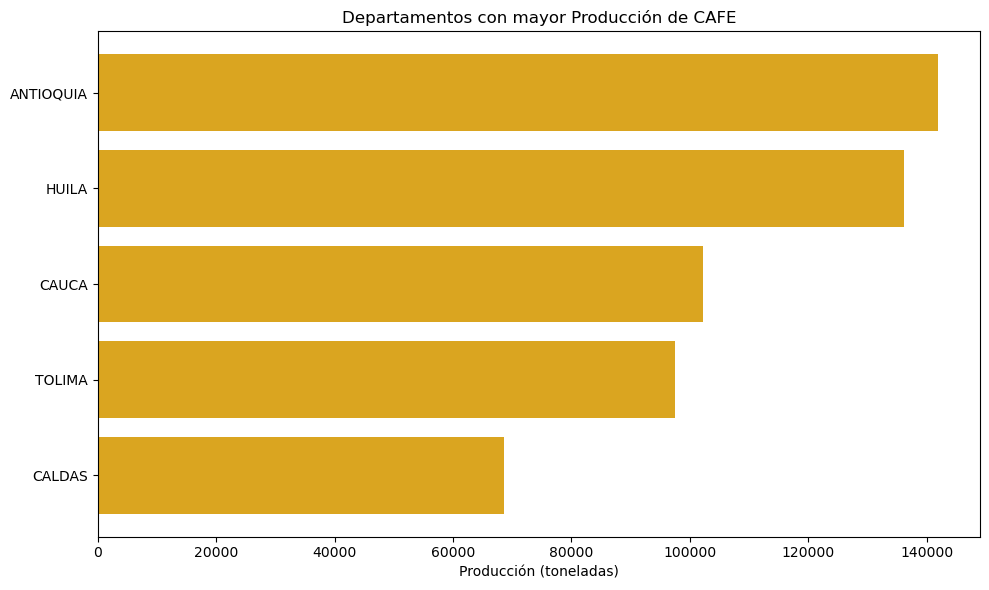

In [116]:
#Indique el cultivo de su interés  y el año mas reciente de eva
cultivo_sel = 'CAFE' 
year = 2018

cultivo = (
    muni_eva
    .query("CULTIVO == @cultivo_sel and AÑO == @year")  
    .copy()
)

#Selección por producción 
produccion_dpto = cultivo.groupby('DEPARTAMENTO')['Producción\n(t)'].sum().reset_index()
Dpto_mayor_prod= produccion_dpto.sort_values('Producción\n(t)', ascending=False).iloc[0]
print("Departamento con mayor produccion de", cultivo_sel, ":", Dpto_mayor_prod['DEPARTAMENTO'])

top_produccion = produccion_dpto.sort_values(by='Producción\n(t)', ascending=False).head()

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_produccion['DEPARTAMENTO'], top_produccion['Producción\n(t)'], color='goldenrod')
plt.xlabel('Producción (toneladas)')
plt.title('Departamentos con mayor Producción de '+ cultivo_sel)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.3.2 Criterios de selección Municipio

Una vez identificado el departamento con mayor producción del cultivo seleccionado, se procede a realizar un análisis espacial detallado dentro de sus municipios. Este análisis busca priorizar el municipio más adecuado para instalar un centro de acopio, utilizando criterios relevantes como: número de estaciones meteorológicas IDEAM, densidad vial, cercanía a vías principales y productividad agrícola normalizada por área.

| Paso | Función/Código | Descripción |
|------|----------------|-------------|
| 1 | `dpto_geom = dptos[dptos['DEPARTAMENTO'] == Dpto_mayor_prod['DEPARTAMENTO']]` | Selecciona la geometría del departamento con mayor producción del cultivo. |
| 2 | `muni_clip = gpd.clip(muni, dpto_geom)` | Recorta (clip) los municipios para conservar solo los que están dentro del departamento seleccionado. |
| 3 | `muni_clip = muni_clip[muni_clip.geom_type.isin(['Polygon', 'MultiPolygon'])].copy()` | Filtra para conservar únicamente geometrías válidas (polígonos o multipolígonos). |
| 4 | `est_muni = gpd.sjoin(gdf_est, muni_clip, predicate='within')` | Une espacialmente las estaciones IDEAM con los municipios recortados para contar cuántas estaciones hay por municipio. |
| 5 | `est_count = est_muni.groupby('MPIO_CDPMP')['geometry'].count().reset_index()` | Agrupa por municipio y cuenta las estaciones presentes. |
| 6 | `vias_muni = gpd.overlay(vias, muni_clip, how='intersection')` | Interseca la red vial con los municipios seleccionados para calcular la densidad vial local. |
| 7 | `vias_muni['long_km'] = vias_muni.geometry.length / 1000` | Calcula la longitud de las vías en kilómetros. |
| 8 | `Densidad_vial = vias_muni.groupby('MPIO_CDPMP')['long_km'].sum().reset_index()` | Suma la longitud de las vías por municipio. |
| 9 | `Densidad_vial = ... merge con geometría y cálculo de área` | Calcula el área de cada municipio y la densidad vial como relación longitud/área. |
| 10 | `vias_buffer = vias[vias['key'] == 'Primer Orden'].copy()` | Filtra las vías principales (de primer orden). |
| 11 | `vias_buffer['geometry'] = vias_buffer.geometry.buffer(5000)` | Genera un buffer de 5 km alrededor de las vías principales. |
| 12 | `viasbuffer_muni = gpd.overlay(muni_clip, vias_buffer, how='intersection')` | Calcula la intersección entre municipios y buffer vial. |
| 13 | `area_cercana = (area_interseccion / area_total).fillna(0)` | Calcula el porcentaje del área del municipio que está a menos de 5 km de una vía principal. |
| 14 | `cultivo_diss = cultivo.dissolve(...)` | Agrupa la producción por municipio y suma la producción total. |
| 15 | `cultivo_diss['eva_norm'] = Producción / área` | Calcula la productividad agrícola normalizada por kilómetro cuadrado (t/km²), útil para comparar eficiencia agrícola. |


In [117]:
# Clip municipioS con departamento con mayor producción
dpto_geom = dptos[dptos['DEPARTAMENTO'] == Dpto_mayor_prod['DEPARTAMENTO']]
muni_clip= gpd.clip(muni, dpto_geom)
muni_clip = muni_clip[muni_clip.geom_type.isin(['Polygon', 'MultiPolygon'])].copy()

#CRITERIOS SELECCION 

# Número de estaciones IDEAM por municipio
est_muni = gpd.sjoin(gdf_est, muni_clip, predicate='within')
est_count = est_muni.groupby('MPIO_CDPMP')['geometry'].count().reset_index()
est_count.columns = ['MPIO_CDPMP', 'estaciones']
print(est_count.head())

# Densidad vial (km / km2)
vias_muni = gpd.overlay(vias, muni_clip, how='intersection')
vias_muni['long_km'] = vias_muni.geometry.length / 1000
Densidad_vial = vias_muni.groupby('MPIO_CDPMP')['long_km'].sum().reset_index()
Densidad_vial = Densidad_vial.merge(muni_clip[['MPIO_CDPMP', 'geometry']], on='MPIO_CDPMP')
Densidad_vial = gpd.GeoDataFrame(Densidad_vial, geometry='geometry')
Densidad_vial['area_km2'] = Densidad_vial.geometry.area / 1e6
Densidad_vial['densidad_vial'] = Densidad_vial['long_km'] / Densidad_vial['area_km2']
print(Densidad_vial.head())

# Porcentaje área cerca de vías principalesb (Filtro + buffer)
vias_buffer = vias[vias['key'] == 'Primer Orden'].copy()
vias_buffer['geometry'] = vias_buffer.geometry.buffer(5000)  
viasbuffer_muni= gpd.overlay(muni_clip, vias_buffer, how='intersection')
viasbuffer_muni['area'] = viasbuffer_muni.geometry.area

area_interseccion = viasbuffer_muni.groupby('MPIO_CDPMP')['area'].sum()
area_total = muni_clip.set_index('MPIO_CDPMP').geometry.area
area_cercana = (area_interseccion / area_total).fillna(0).reset_index()
area_cercana.columns = ['MPIO_CDPMP', 'pct_cercania_vial']
print(area_cercana.head())

# Producción por municipio 
cultivo_diss = cultivo.dissolve(
    by='MPIO_CDPMP',
    aggfunc={'Producción\n(t)': 'sum'}).reset_index()

cultivo_diss['eva_norm'] = cultivo_diss['Producción\n(t)']/ (cultivo_diss.geometry.area / 1e6)
print(cultivo_diss[['MPIO_CDPMP', 'eva_norm']].head())


  MPIO_CDPMP  estaciones
0      05001          58
1      05002           9
2      05004           2
3      05021           9
4      05030           5
  MPIO_CDPMP    long_km                                           geometry  \
0      05001  36.270684  POLYGON ((4704772.35 2263034.696, 4704773.449 ...   
1      05002   9.236250  POLYGON ((4726759.826 2215599.731, 4726799.266...   
2      05030  11.584038  POLYGON ((4703973.264 2231104.18, 4704009.66 2...   
3      05038  12.899122  POLYGON ((4749115.329 2328877.002, 4749127.71 ...   
4      05042  41.313957  POLYGON ((4686889.417 2294371.931, 4686904.811...   

     area_km2  densidad_vial  
0  374.738101       0.096789  
1  506.952804       0.018219  
2   84.117144       0.137713  
3  338.525974       0.038104  
4  525.571520       0.078608  
  MPIO_CDPMP  pct_cercania_vial
0      05001           0.980417
1      05002           0.158285
2      05004           0.038729
3      05021           0.000000
4      05030           3.318009
  M

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.3.3 Unión y evaluación de criterios de decisión multicriterio

Una vez calculadas las variables clave (número de estaciones IDEAM, densidad vial, productividad agrícola normalizada y cercanía a vías principales), se integran en un solo GeoDataFrame para realizar un análisis multicriterio ponderado. Cada criterio se normaliza para que los valores estén en una escala común (0 a 1), y luego se combinan usando pesos asignados según su importancia relativa en la decisión. El resultado es un índice final que permite priorizar el municipio más adecuado para la ubicación del centro de acopio.

| Paso | Función / Código | Descripción |
|------|------------------|-------------|
| 1 | `criterios = muni_clip[['MPIO_CDPMP', 'MPIO_CNMBR', 'geometry']].copy()` | Crea un GeoDataFrame base con los municipios recortados. |
| 2 | `merge(...)` (varios) | Une las columnas de los criterios calculados previamente: estaciones, densidad vial, productividad y cercanía vial. |
| 3 | `for col in [...]` | Normaliza cada uno de los criterios a una escala de 0 a 1, para que sean comparables. |
| 4 | `pesos = {...}` | Define los pesos asignados a cada criterio según su importancia. |
| 5 | `criterios['indice_final'] = ...` | Calcula el **índice final** como la suma ponderada de los criterios normalizados. |
| 6 | `criterios.sort_values('indice_final', ascending=False)` | Ordena los municipios de mayor a menor puntaje, priorizando los más adecuados. |

In [118]:
# Unión de todos los criterios
criterios = muni_clip[['MPIO_CDPMP', 'MPIO_CNMBR', 'geometry']].copy()
criterios = criterios.merge(est_count, on='MPIO_CDPMP', how='left')
criterios = criterios.merge(Densidad_vial[['MPIO_CDPMP', 'densidad_vial']], on='MPIO_CDPMP', how='left')
criterios = criterios.merge(cultivo_diss[['MPIO_CDPMP', 'eva_norm']], on='MPIO_CDPMP', how='left')
criterios = criterios.merge(area_cercana, on='MPIO_CDPMP', how='left')

# Normalización y ponderación
for col in ['estaciones', 'densidad_vial', 'eva_norm', 'pct_cercania_vial']:
    criterios[col] = (criterios[col] - criterios[col].min()) / (criterios[col].max() - criterios[col].min())

# Pesos de decisión
pesos = {'estaciones': 0.2, 'densidad_vial': 0.2, 'eva_norm': 0.3, 'pct_cercania_vial': 0.3}
criterios['indice_final'] = sum(criterios[c] * p for c, p in pesos.items())

criterios.sort_values('indice_final', ascending=False).head()


,MPIO_CDPMP,MPIO_CNMBR,geometry,estaciones,densidad_vial,eva_norm,pct_cercania_vial,indice_final
22,05129,CALDAS,"POLYGON ((4705000.809 2234796.257, 4705000.339...",0.245614,0.390497,0.030313,1.000000,0.436316
89,05101,CIUDAD BOLÍVAR,"POLYGON ((4663001.065 2213929.719, 4663112.576...",0.157895,0.175068,1.000000,0.116025,0.401400
94,05209,CONCORDIA,"POLYGON ((4680187.956 2240559.811, 4680232.517...",0.070175,0.160188,0.909011,0.124174,0.356028
92,05642,SALGAR,"POLYGON ((4668169.654 2229631.193, 4668178.724...",0.087719,0.074278,0.873403,0.056474,0.311363
28,05360,ITAGÜÍ,"POLYGON ((4712317.201 2243812.144, 4712324.049...",0.087719,1.000000,0.049620,0.236185,0.303285


<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 2.3.4 Selección y visualización del municipio óptimo 

Una vez calculado el índice de idoneidad para cada municipio, se selecciona el que presenta el mayor valor del índice final como el candidato óptimo para la instalación del centro de acopio. Este municipio se destaca gráficamente en un mapa temático que muestra la distribución espacial de los valores del índice, permitiendo una visualización clara de la priorización territorial.

| Paso | Función / Código | Descripción |
|------|------------------|-------------|
| 1 | `mejor_muni = criterios.sort_values('indice_final', ascending=False).head(1)` | Selecciona el municipio con el valor más alto del índice final. |
| 2 | `fig, ax = plt.subplots(...)` | Crea una figura y un eje para el gráfico. |
| 3 | `muni_clip.plot(...)` | Dibuja todos los municipios del departamento en gris claro. |
| 4 | `criterios.plot(column='indice_final', ...)` | Muestra un mapa coroplético del índice final con una escala de color (`Blues`). |
| 5 | `mejor_muni.boundary.plot(...)` | Resalta el municipio óptimo con un borde rojo más grueso. |
| 6 | `centroide = mejor_muni.geometry.centroid.iloc[0]` | Calcula el centroide del municipio óptimo. |
| 7 | `plt.text(...)` | Añade una etiqueta con el nombre del municipio sobre el mapa. |
| 8 | `plt.title(...)` | Agrega un título descriptivo al mapa. |
| 9 | `plt.show()` | Muestra la visualización completa del análisis. |

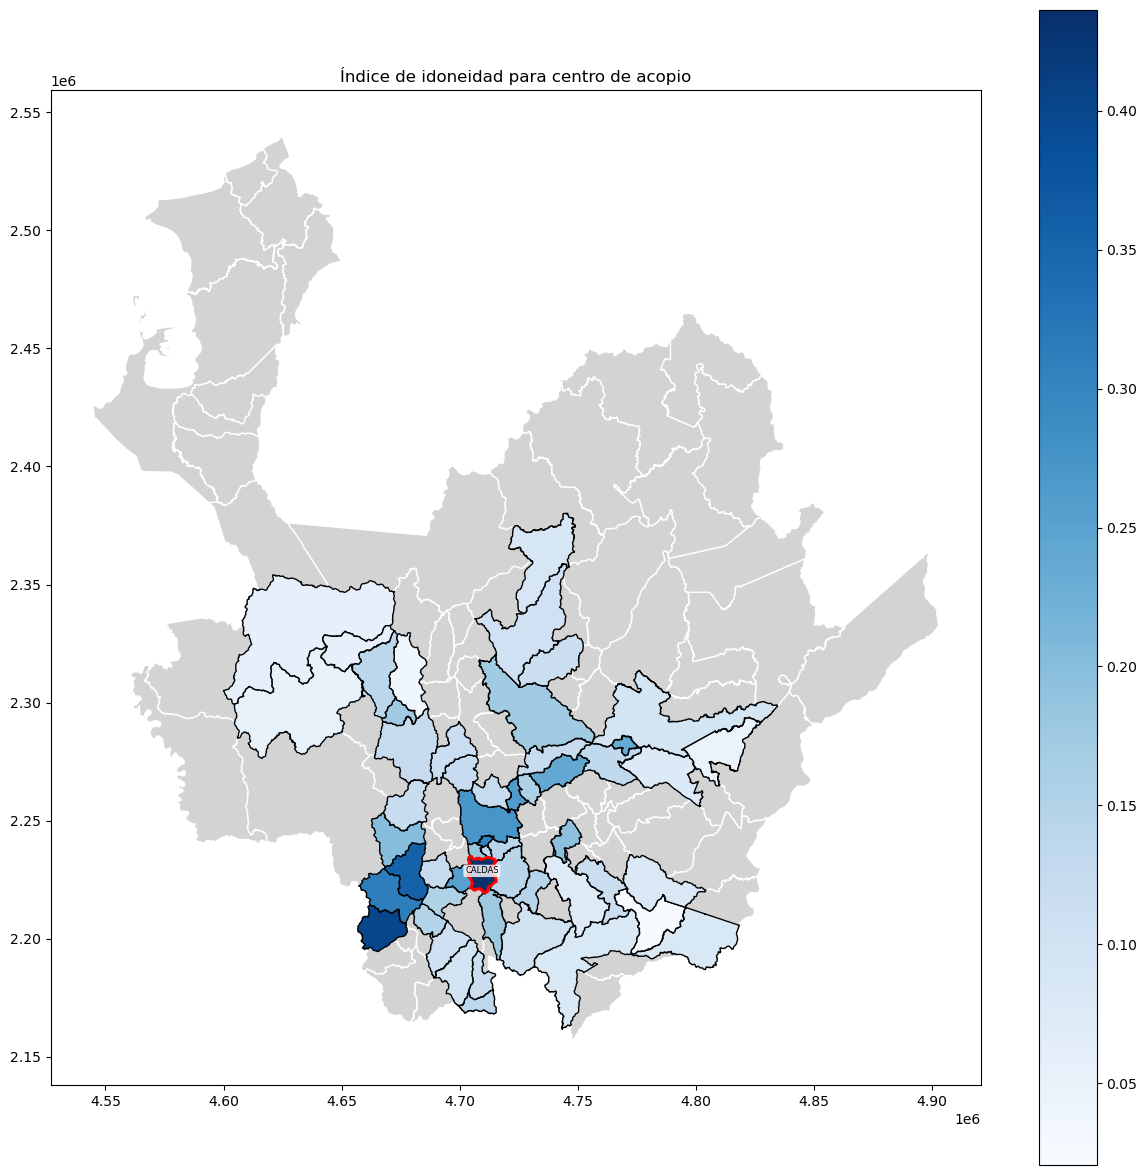

In [119]:
# Selección municipio con mayor índice
mejor_muni = criterios.sort_values('indice_final', ascending=False).head(1)

#Visualización

fig, ax = plt.subplots(figsize=(15, 15))
muni_clip.plot(ax=ax, color='lightgray', edgecolor='white')
criterios.plot(ax=ax, column='indice_final', legend=True, cmap='Blues', edgecolor='black')
mejor_muni.boundary.plot(ax=ax, color='red', linewidth=2)
nombre = mejor_muni.iloc[0]['MPIO_CNMBR'] 
centroide = mejor_muni.geometry.centroid.iloc[0]

plt.text(
    centroide.x, centroide.y,
    nombre,
    fontsize=6,
    color='black',
    ha='center',
    bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, boxstyle='round,pad=0.2')
)

plt.title("Índice de idoneidad para centro de acopio")
plt.show()

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
### 3. 🌐 Análisis espacial para selección de la zona en el Municipio óptimo

Una vez identificado el municipio óptimo para la instalación del centro de acopio, se procede a un análisis espacial más detallado a escala intra-municipal. Esta etapa busca delimitar el polígono más adecuado dentro del territorio municipal, integrando múltiples capas de información geográfica relevantes.

El proceso incluye los siguientes pasos:

* Evaluación de coberturas del suelo: Se analizan las clases de uso y cobertura de la tierra, para identificar terrenos aptos y disponibles. Se priorizan zonas agrícolas consolidadas

* Análisis de amenazas de remoción en masa: Se utiliza cartografía de zonificación de amenaza por deslizamientos y movimientos en masa para evitar ubicar el centro de acopio en áreas de alto riesgo. Solo se consideran zonas catalogadas como amenaza baja y media, garantizando así la seguridad estructural y operativa a largo plazo.

* Accesibilidad vial: Se calcula la proximidad y conectividad a vías primarias y secundarias, aplicando buffers y análisis de intersección espacial. Se priorizan áreas cercanas a corredores viales principales que faciliten la entrada y salida de productos agropecuarios, optimizando así la logística de transporte.

* Intersección de criterios: Se realiza una operación espacial de intersección entre las capas preprocesadas para identificar zonas que cumplan simultáneamente con los tres criterios: aptitud del suelo, bajo riesgo geológico y buena accesibilidad. De esta forma, se delimita una o varias áreas candidatas que representan la mejor opción para la localización precisa del centro de acopio dentro del municipio seleccionado.

* Proximidad a centros poblados: Finalmente, entre las áreas candidatas, se da preferencia a aquellas más cercanas a zonas artificializadas (indicadores de asentamientos humanos), optimizando el acceso a mano de obra, servicios e infraestructura básica.


<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 3.1 🗂️Cargue Datos adicionales

Para realizar una selección precisa de la zona donde se ubicará el centro de acopio dentro del municipio seleccionado, es fundamental incorporar capas geográficas adicionales que aporten criterios de exclusión y aptitud. En esta fase se cargan las siguientes capas temáticas, previamente recortadas al municipio de interés para optimizar el rendimiento del procesamiento:

* Zonificación de amenaza por remoción en masa, útil para descartar áreas de riesgo geotécnico.

* Coberturas del suelo, esenciales para identificar usos actuales y áreas disponibles o adecuadas para intervención.

Ambas capas se reproyectan al sistema de coordenadas local (EPSG:9377) para garantizar la compatibilidad con los datos municipales utilizados anteriormente.

| Paso | Función / Código | Descripción |
|------|------------------|-------------|
| 1 | `Ruta_Carpeta = r"/notebooks/Datos"` | Define la ruta base donde están almacenadas las capas temáticas recortadas al municipio. |
| 2 | `REMOCION = Ruta_Carpeta+'/Remocion_Caldas'` | Establece la ruta al archivo de zonificación de amenaza por remoción en masa. |
| 3 | `COBERTURAS = Ruta_Carpeta+'/coberturas_municipio_caldas'` | Define la ruta a la capa de coberturas del suelo para el municipio. |
| 4 | `remocion = gpd.read_file(REMOCION).to_crs(epsg=9377)` | Carga la capa de remoción en masa y la reproyecta al sistema de coordenadas local. |
| 5 | `print("CRS Remoción:", remocion.crs)` | Imprime el sistema de referencia espacial de la capa para verificar compatibilidad. |
| 6 | `remocion.info()` | Muestra un resumen de la estructura de la capa de remoción en masa. |
| 7 | `coberturas = gpd.read_file(COBERTURAS).to_crs(epsg=9377)` | Carga la capa de coberturas del suelo y la reproyecta al mismo sistema de coordenadas. |
| 8 | `print("CRS Coberturas:", coberturas.crs)` | Verifica el CRS de la capa de coberturas. |
| 9 | `coberturas.head()` | Muestra las primeras filas de la tabla de atributos para inspección inicial. |


In [32]:
# Cargue capas adicionales
# Se recomienda subir los datos por el municipio 
# para minimizar procesamiento

Ruta_Carpeta=r"/notebooks/Datos"

REMOCION = Ruta_Carpeta+'/Remocion_Caldas.shp'
COBERTURAS  = Ruta_Carpeta+'/coberturas_municipio_caldas.shp'

# Capa de zonificacion de amenaza remoción en masa
remocion = gpd.read_file(REMOCION).to_crs(epsg=9377)
print("CRS Remoción:", remocion.crs)  
remocion.info()

#Coberturas de la tierra
coberturas = gpd.read_file(COBERTURAS).to_crs(epsg=9377)
print("CRS Coberturas:", coberturas.crs)  
coberturas.head()

CRS Remoción: EPSG:9377
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 880 entries, 0 to 879
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    880 non-null    int64   
 1   Id          880 non-null    int64   
 2   gridcode    880 non-null    int64   
 3   Catame      880 non-null    object  
 4   Amenaza     880 non-null    object  
 5   Shape_Leng  880 non-null    float64 
 6   Shape_Area  880 non-null    float64 
 7   geometry    880 non-null    geometry
dtypes: float64(2), geometry(1), int64(3), object(2)
memory usage: 55.1+ KB
CRS Coberturas: EPSG:9377


,codigo,leyenda,insumo,apoyo,confiabili,cambio,nivel_1,nivel_2,nivel_3,nivel_4,nivel_5,nivel_6,Shape_Leng,Shape_Area,geometry
0,242,2.4.2. Mosaico de pastos y cultivos,Landsat_2018_median_06052019_v9,"Landsat7_956_20180730, Landsat7_956_20180714, ...",SI,2. Polígono actualizado,2. Territorios agrícolas,2.4. Áreas agrícolas heterogéneas,2.4.2. Mosaico de pastos y cultivos,None,None,None,0.072472,0.000105,"MULTIPOLYGON (((4705167.559 2224167.185, 47051..."
1,244,2.4.4. Mosaico de pastos con espacios naturales,Landsat_2018_median_06052019_v9,"Landsat7_956_20180730, Landsat7_956_20180714, ...",SI,2. Polígono actualizado,2. Territorios agrícolas,2.4. Áreas agrícolas heterogéneas,2.4.4. Mosaico de pastos con espacios naturales,None,None,None,0.023992,0.000032,"POLYGON ((4708250.726 2225734.291, 4708239.568..."
2,244,2.4.4. Mosaico de pastos con espacios naturales,Landsat_2018_median_06052019_v9,"Landsat7_956_20180730, Landsat7_956_20180714, ...",SI,2. Polígono actualizado,2. Territorios agrícolas,2.4. Áreas agrícolas heterogéneas,2.4.4. Mosaico de pastos con espacios naturales,None,None,None,0.038188,0.000034,"POLYGON ((4707010.134 2225626.865, 4706997.389..."
3,3231,3.2.3.1. Vegetación secundaria alta,Landsat_2018_median_06052019_v9,"Landsat7_956_20180730, Landsat7_956_20180714, ...",SI,2. Polígono actualizado,3. Bosques y áreas seminaturales,3.2. Áreas con vegetación herbácea y/o arbustiva,3.2.3. Vegetación secundaria o en transición,3.2.3.1. Vegetación secundaria alta,None,None,0.148807,0.000165,"POLYGON ((4706035.006 2222388.861, 4706005.099..."
4,231,2.3.1. Pastos limpios,Landsat_2018_median_06052019_v9,"Landsat7_956_20180730, Landsat7_956_20180714, ...",SI,2. Polígono actualizado,2. Territorios agrícolas,2.3. Pastos,2.3.1. Pastos limpios,None,None,None,0.057043,0.000033,"POLYGON ((4712668.602 2225174.131, 4712673.836..."


<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 3.2 🌿Visualización Datos

| Paso | Función / Código | Descripción |
|------|------------------|-------------|
| 1 | `vias_local = gpd.overlay(vias, mejor_muni, how='intersection')` | Extrae las vías dentro del municipio óptimo mediante intersección espacial. |
| 2 | `.to_crs(epsg=3857)` (varias capas) | Proyecta todas las capas al sistema Web Mercator (EPSG:3857) para su visualización con mapas base. |
| 3 | `fig, (ax1, ax2) = plt.subplots(1, 2, ...)` | Crea una figura con dos subgráficos (subplots) lado a lado. |
| 4 | `ax1: Amenaza por Remoción` | Dibuja el límite del municipio, las vías locales y la zonificación de remoción con leyenda categórica y colores (de rojo a verde según nivel de amenaza). |
| 5 | `cx.add_basemap(ax1, source=...)` | Añade un mapa base para contexto geográfico. |
| 6 | `ax2: Coberturas del Suelo` | Muestra las coberturas de la tierra nivel 1 con una leyenda y paleta de colores. |
| 7 | `plt.tight_layout()` y `plt.show()` | Ajusta el diseño para evitar superposición y muestra la figura. |

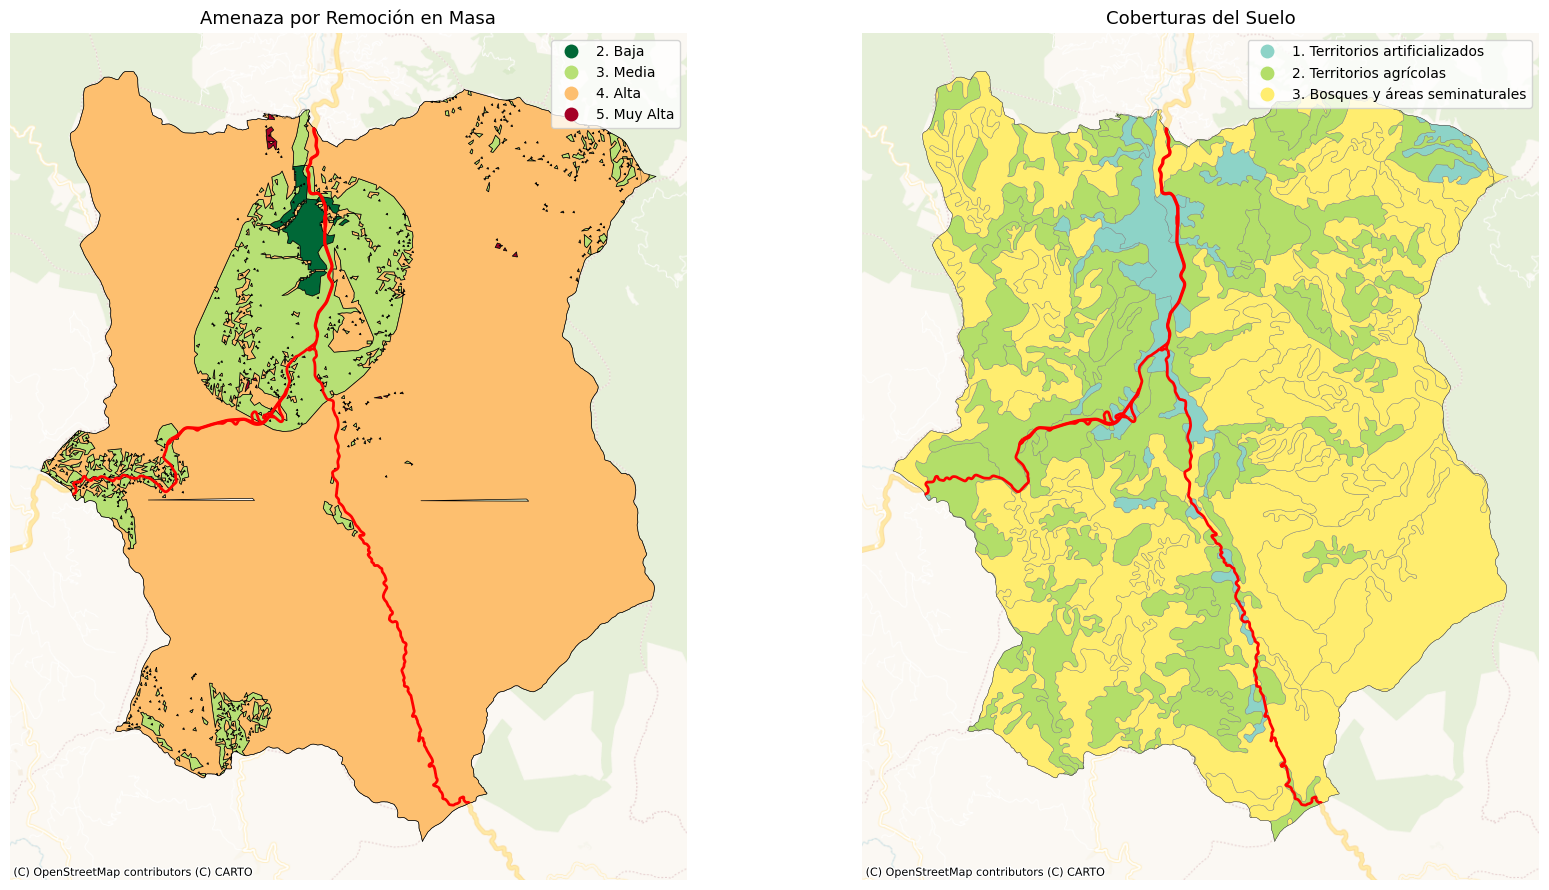

In [41]:
# Subconjunto de capas con el municipio óptimo
# las capas de remocion y coberturas ya vienen cortadas por el municipio
vias_local = gpd.overlay(vias, mejor_muni, how='intersection')

#Visualización general datos -Selección zona
#Proyección capas
remocion_plot = remocion.to_crs(epsg=3857)
coberturas_plot = coberturas.to_crs(epsg=3857)
mejor_muni_plot = mejor_muni.to_crs(epsg=3857)
vias_local_plot = vias_local.to_crs(epsg=3857)

# Creación figura con 2 subgráficos 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

# Subplot 1: Remoción 
mejor_muni_plot.boundary.plot(ax=ax1, edgecolor='black', linewidth=0.2)
vias_local_plot.plot(ax=ax1, color='red', linewidth=2)
remocion_plot.plot(
    ax=ax1,
    column='Amenaza',
    categorical=True,
    legend=True,
    cmap='RdYlGn_r',
    edgecolor='black',
    linewidth=0.5
)
cx.add_basemap(ax1, source=cx.providers.CartoDB.Voyager)
ax1.set_title("Amenaza por Remoción en Masa", fontsize=13)
ax1.set_axis_off()

# Subplot 2: Coberturas del Suelo 
mejor_muni_plot.boundary.plot(ax=ax2, edgecolor='black', linewidth=0.2)
vias_local_plot.plot(ax=ax2, color='red', linewidth=2)
coberturas_plot.plot(
    ax=ax2,
    column='nivel_1',
    categorical=True,
    legend=True,
    cmap='Set3',
    edgecolor='gray',
    linewidth=0.3
)
cx.add_basemap(ax2, source=cx.providers.CartoDB.Voyager)
ax2.set_title("Coberturas del Suelo", fontsize=13)
ax2.set_axis_off()
plt.tight_layout()
plt.show()

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 3.3 🧱Generación grilla de 1 km

Para facilitar la evaluación espacial detallada dentro del municipio seleccionado, se genera una cuadrícula regular de celdas de 1 km x 1 km. Esta grilla permite dividir el territorio en unidades comparables y sistemáticas, sobre las cuales se calculan los indicadores de aptitud, accesibilidad, baja amenaza de remosión en masa y cobertura del suelo. Luego, se recorta la grilla para que se ajuste exactamente al contorno del municipio.

| Paso | Función / Código | Descripción |
|------|------------------|-------------|
| 1 | `bounds = mejor_muni.total_bounds` | Obtiene los límites espaciales del municipio seleccionado como un rectángulo envolvente (xmin, ymin, xmax, ymax). |
| 2 | `x_min, y_min, x_max, y_max = bounds` | Asigna los valores mínimos y máximos de coordenadas en X e Y. |
| 3 | `x_coords = np.arange(x_min, x_max, 1000)` | Genera una secuencia de coordenadas X cada 1000 metros (1 km). |
| 4 | `y_coords = np.arange(y_min, y_max, 1000)` | Genera una secuencia de coordenadas Y cada 1000 metros (1 km). |
| 5 | `polygons = [Polygon(...)]` | Crea una lista de polígonos de 1 km² combinando coordenadas X e Y como vértices de cuadrados. |
| 6 | `grilla = gpd.GeoDataFrame(geometry=polygons, crs=9377)` | Convierte la lista de polígonos en un GeoDataFrame con sistema de referencia EPSG:9377. |
| 7 | `grilla = gpd.overlay(grilla, mejor_muni, how='intersection')` | Recorta la grilla para que solo queden las celdas dentro del municipio seleccionado. |

In [109]:
# Generación grilla 1 km
bounds = mejor_muni.total_bounds
x_min, y_min, x_max, y_max = bounds
x_coords = np.arange(x_min, x_max, 1000)
y_coords = np.arange(y_min, y_max, 1000)
polygons = [Polygon([(x, y), (x+1000, y), (x+1000, y+1000), (x, y+1000)]) for x in x_coords for y in y_coords]
grilla = gpd.GeoDataFrame(geometry=polygons, crs=9377)
grilla = gpd.overlay(grilla, mejor_muni, how='intersection')

grilla.head()

,MPIO_CDPMP,MPIO_CNMBR,estaciones,densidad_vial,eva_norm,pct_cercania_vial,indice_final,geometry
0,05129,CALDAS,0.245614,0.390497,0.030313,1.0,0.436316,"MULTIPOLYGON (((4703973.704 2226273.202, 47039..."
1,05129,CALDAS,0.245614,0.390497,0.030313,1.0,0.436316,"POLYGON ((4703679.943 2226273.202, 4703677.341..."
2,05129,CALDAS,0.245614,0.390497,0.030313,1.0,0.436316,"POLYGON ((4703973.704 2227273.202, 4703357.443..."
3,05129,CALDAS,0.245614,0.390497,0.030313,1.0,0.436316,"POLYGON ((4703973.704 2231273.202, 4703973.704..."
4,05129,CALDAS,0.245614,0.390497,0.030313,1.0,0.436316,"POLYGON ((4703973.704 2231273.202, 4703875.32 ..."


<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 3.4 🏡Definición criterios y selección zona óptima

Este proceso busca delimitar la zona óptima de 1 km² donde ubicar el centro de acopio, considerando criterios locales de aptitud territorial. Para ello, se utiliza una grilla regular y se aplican filtros espaciales de zonificación de amenaza de remoción baja o media, coberturas agricolas y accesibilidad vial. Finalmente, se prioriza la zona más cercana a un centro poblado.
 
| Paso | Función / Código | Descripción |
|------|------------------|-------------|
| 1 | `remocion_baja_media = remocion[remocion['Amenaza'].isin(['2. Baja', '3. Media'])]` | Se filtran las zonas con nivel de amenaza por remoción en masa baja o media. |
| 2 | `remocion_inter = gpd.sjoin(grilla, remocion_baja_media, predicate='intersects')` | Se seleccionan las celdas de la grilla que intersectan con zonas seguras. |
| 3 | `coberturas['uso_valido'] = (coberturas['nivel_1'] == '2. Territorios agrícolas').astype(int)` | Se marca como válidas las coberturas agrícolas dentro del municipio. |
| 4 | `cobertura_inter = gpd.overlay(grilla, coberturas[...])` | Se identifican las celdas de la grilla ubicadas sobre coberturas agrícolas. |
| 5 | `vias_buffer_local = vias_local.buffer(500)` | Se crea un buffer de 500 metros alrededor de las vías locales. |
| 6 | `vias_inter = gpd.sjoin(grilla_proj, vias_buffer_local, predicate='intersects')` | Se seleccionan las celdas cercanas a las vías (dentro del buffer). |
| 7 | `zonas_validas_ids = set(...) & set(...) & set(...)` | Se obtienen las celdas que cumplen simultáneamente con los tres criterios anteriores. |
| 8 | `zonas_validas = grilla_proj.loc[...]` | Se crea un subconjunto con las celdas válidas según la intersección de filtros. |
| 9 | `artificializados = coberturas[coberturas['nivel_1'] == '1. Territorios artificializados']` | Se cargan los centros poblados del municipio. |
|10 | `zonas_validas['dist_centro'] = zonas_validas['centroide'].apply(...)` | Se calcula la distancia mínima de cada celda válida a un centro poblado. |
|11 | `mejor_celda = zonas_validas.loc[zonas_validas['dist_centro'].idxmin()]` | Se selecciona la celda más cercana al área urbana como ubicación óptima. |

In [110]:
# Criterios locales
# Filtrar remoción baja o media
remocion_baja_media = remocion[remocion['Amenaza'].isin(['2. Baja', '3. Media'])]
remocion_inter = gpd.sjoin(grilla, remocion_baja_media, predicate='intersects', how='inner')
remocion_ids = remocion_inter.index.unique()

# Coberturas agrícolas
coberturas['uso_valido'] = (coberturas['nivel_1'] == '2. Territorios agrícolas').astype(int)
grilla['grilla_id'] = grilla.index
cobertura_inter = gpd.overlay(grilla, coberturas[coberturas['uso_valido'] == 1], how='intersection')
cobertura_ids = cobertura_inter['grilla_id'].unique()

# Cercanía a vías (500 m)
vias_buffer_local = vias_local.copy()
vias_buffer_local = vias_buffer_local.to_crs(epsg=3857)
grilla_proj = grilla.to_crs(epsg=3857)
vias_buffer_local['geometry'] = vias_buffer_local.buffer(500)
vias_inter = gpd.sjoin(grilla_proj, vias_buffer_local, predicate='intersects', how='inner')
vias_ids = vias_inter.index.unique()

# Intersección de los 3 filtros
zonas_validas_ids = set(remocion_ids) & set(cobertura_ids) & set(vias_ids)
zonas_validas = grilla_proj.loc[grilla_proj.index.isin(zonas_validas_ids)].copy()

# centros poblados: uso de 'Territorios artificializados'
artificializados = coberturas[coberturas['nivel_1'] == '1. Territorios artificializados'].to_crs(epsg=3857)

# Calculo distancia mínima desde cada celda al polígono artificializado
zonas_validas['centroide'] = zonas_validas.geometry.centroid
zonas_validas['dist_centro'] = zonas_validas['centroide'].apply(
    lambda x: artificializados.distance(x).min()
)
# Seleccioón celda más cercana
mejor_celda = zonas_validas.loc[zonas_validas['dist_centro'].idxmin()]


<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
#### 3.5 🌎Visualización zona óptima

se genera un mapa que muestra gráficamente las celdas de grilla que cumplen con todos los criterios (zonas válidas), resaltando en azul la celda seleccionada como óptima por su proximidad a centros poblados (territorios artificializados). Esta visualización permite verificar espacialmente la pertinencia de la selección.

| Paso | Función / Código | Descripción |
|------|------------------|-------------|
| 1 | `fig, ax = plt.subplots(figsize=(10, 10))` | Se inicializa una figura y un eje para la visualización espacial. |
| 2 | `mejor_muni_plot.boundary.plot(...)` | Se dibuja el límite del municipio seleccionado como referencia espacial. |
| 3 | `zonas_validas.plot(...)` | Se grafican en color azul claro todas las celdas de grilla que cumplen los tres criterios locales. |
| 4 | `gpd.GeoSeries(mejor_celda.geometry).plot(...)` | Se representa en azul oscuro la celda óptima seleccionada. |
| 5 | `artificializados.plot(...)` | Se visualizan en rojo las zonas urbanas (territorios artificializados). |
| 6 | `cx.add_basemap(...)` | Se añade un mapa base de CartoDB Voyager para mayor contexto geográfico. |
| 7 | `plt.title(...)` | Se agrega un título descriptivo a la figura. |
| 8 | `plt.axis('off')` | Se ocultan los ejes del gráfico para una presentación más limpia. |
| 9 | `legend_elements = [...]` | Se definen manualmente los elementos de leyenda con sus colores y etiquetas. |
|10 | `ax.legend(handles=legend_elements, loc='upper right')` | Se muestra la leyenda personalizada en la esquina superior derecha. |
|11 | `plt.tight_layout(); plt.show()` | Se ajusta el diseño de la figura y se despliega el gráfico. |


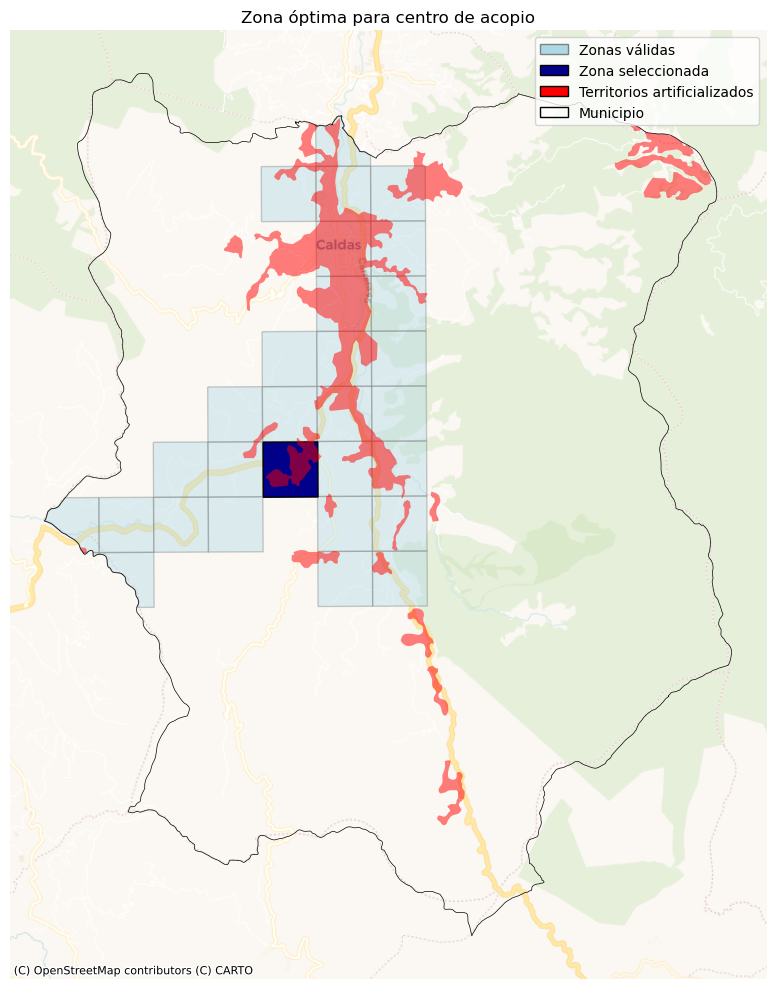

In [108]:
# 8. Visualización
fig, ax = plt.subplots(figsize=(10, 10))
mejor_muni_plot.boundary.plot(ax=ax, color='black', linewidth=0.5)
zonas_validas.plot(ax=ax, color='lightblue', edgecolor='gray', alpha=0.4)
gpd.GeoSeries(mejor_celda.geometry).plot(ax=ax, color='darkblue', edgecolor='black')
artificializados.plot(ax=ax, color='red', alpha=0.5)
cx.add_basemap(ax, source=cx.providers.CartoDB.Voyager)
plt.title("Zona óptima para centro de acopio")
plt.axis('off')

# 🔧 Leyenda personalizada
legend_elements = [
    mpatches.Patch(facecolor='lightblue', edgecolor='gray', label='Zonas válidas'),
    mpatches.Patch(facecolor='darkblue', edgecolor='black', label='Zona seleccionada'),
    mpatches.Patch(facecolor='red', edgecolor='black', label='Territorios artificializados'),
    mpatches.Patch(facecolor='none', edgecolor='black', label='Municipio')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()

<div style=" border-left: 6px solid #1f618d; padding: 12px 16px; background: #d6eaf8; border-radius: 4px;
    font-size: 95%; overflow-x: auto; max-width: 100%; box-sizing: border-box;">
    
### 4. 🧠 CONCLUSIÓN

El ejercicio desarrollado demuestra cómo la integración de diversas capas de información geográfica mediante técnicas de análisis espacial permite tomar decisiones informadas y objetivas sobre la localización óptima de infraestructuras rurales, en este caso, un centro de acopio agropecuario.

se logró:

* Seleccionar el municipio más idóneo mediante un índice ponderado normalizado.

* Delimitar las zonas viables dentro del municipio a través de la superposición de filtros geoespaciales.

* Seleccionar una celda espacial específica (grilla de 1 km²) que presenta las condiciones favorables para la localización  de un centro de acopio.

